# Import thư viện

In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from PIL import Image
from tqdm import tqdm

# Một số ảnh từ tệp dữ liệu

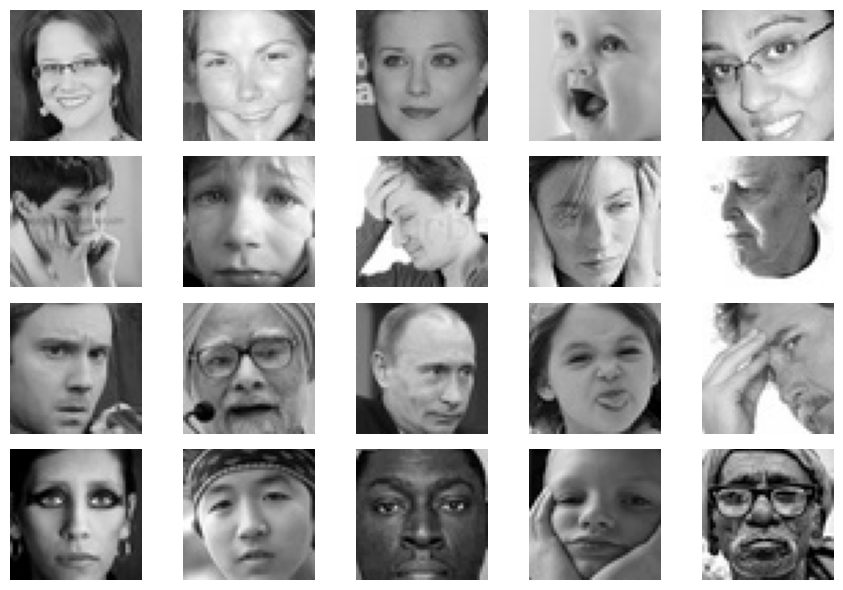

In [27]:
# Đường dẫn đến dữ liệu
data_dir = 'Data'
emotion_labels = ['happy', 'sad', 'angry', 'neutral']

# Tạo dictionary để lưu trữ đường dẫn và số lượng ảnh cho từng lớp cảm xúc
data_summary = {}
for label in emotion_labels:
    data_summary[label] = glob(os.path.join(data_dir, label, '*.jpg'))

# Hiển thị một số mẫu ảnh từ từng lớp
fig, axs = plt.subplots(len(emotion_labels), 5, figsize=(9, 6))
for i, label in enumerate(emotion_labels):
    for j in range(5):
        img = Image.open(data_summary[label][j]).convert('RGB')  # Chuyển đổi sang RGB
        axs[i, j].imshow(img)
        axs[i, j].axis('off')
    axs[i, 0].set_ylabel(label, rotation=0, size='large')
plt.tight_layout()
plt.show()

# Chuyển đổi data từ dạng ảnh sang pixel

In [28]:
def create_dataset_from_folders():
    # Dictionary ánh xạ tên folder với nhãn cảm xúc
    emotion_mapping = {
        'Happy': 'Vui vẻ',
        'Sad': 'Buồn', 
        'Angry': 'Giận dữ',
        'Neutral': 'Bình thường'
    }
    # List để lưu dữ liệu
    data = []
    # Duyệt qua từng folder cảm xúc
    for folder_name, emotion_label in emotion_mapping.items():
        folder_path = f'./Data/{folder_name}'  # Điều chỉnh đường dẫn theo cấu trúc thư mục của bạn
        
        # Duyệt qua từng file trong folder
        for img_name in tqdm(os.listdir(folder_path), desc=f'Processing {emotion_label}'):
            if img_name.endswith(('.jpg', '.jpeg', '.png')):  # Chỉ xử lý file ảnh
                img_path = os.path.join(folder_path, img_name)
                try:
                    # Đọc ảnh
                    img = Image.open(img_path)
                    # Chuyển sang ảnh xám nếu ảnh là RGB
                    if img.mode != 'L':
                        img = img.convert('L')
                    # Resize về 48x48 nếu kích thước khác
                    if img.size != (48, 48):
                        img = img.resize((48, 48))
                    # Chuyển ảnh thành mảng numpy
                    img_array = np.array(img)
                    # Flatten array và chuyển thành chuỗi
                    pixels_str = ' '.join(map(str, img_array.flatten()))
                    # Thêm vào list dữ liệu
                    data.append({
                        'pixels': pixels_str,
                        'emotion': emotion_label
                    })
                except Exception as e:
                    print(f"Error processing {img_path}: {str(e)}")
    
    # Tạo DataFrame
    df = pd.DataFrame(data)
    
    # Kiểm tra và hiển thị thông tin
    print("\nDataset Summary:")
    print("-" * 50)
    print(f"Total images: {len(df)}")
    print("\nImages per emotion:")
    print(df['emotion'].value_counts())
    
    # Lưu thành file CSV
    csv_path = 'emotion_dataset.csv'
    df.to_csv(csv_path, index=False)
    print(f"\nDataset saved to {csv_path}")
    
    return df

# Chạy hàm để tạo dataset
df = create_dataset_from_folders()

Processing Bình thường: 100%|██████████| 5591/5591 [00:05<00:00, 985.10it/s] 



Dataset Summary:
--------------------------------------------------
Total images: 23595

Images per emotion:
emotion
Vui vẻ         8094
Bình thường    5591
Buồn           5424
Giận dữ        4486
Name: count, dtype: int64

Dataset saved to emotion_dataset.csv


#### Lấy dataframe từ file csv

In [29]:
df = pd.read_csv('emotion_dataset.csv')

# Phân phối data

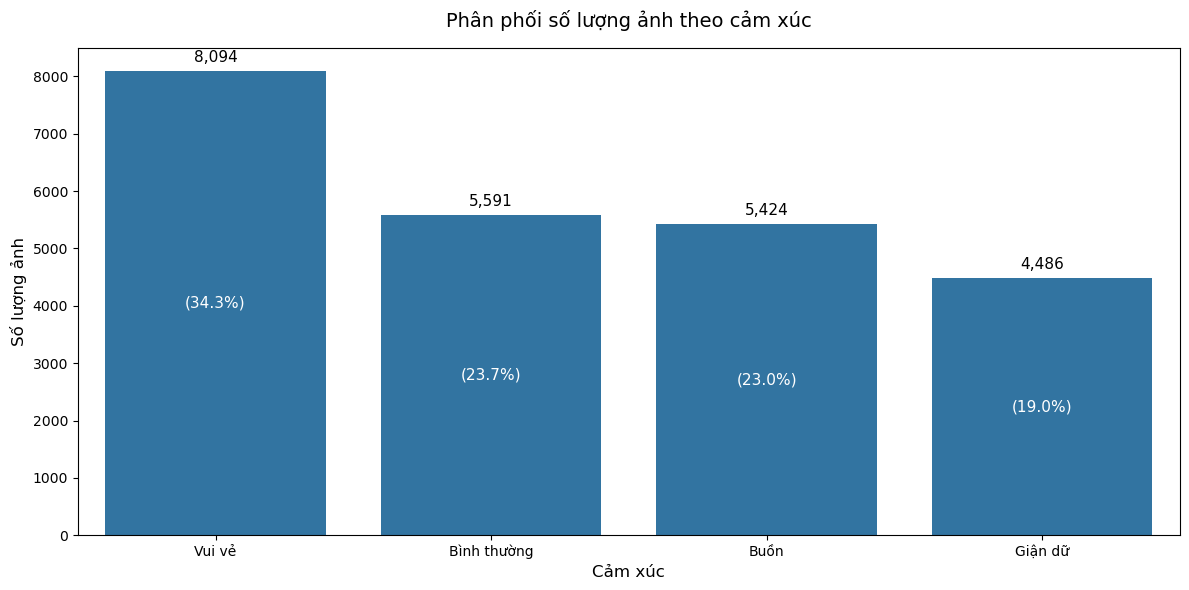


Thống kê số lượng ảnh theo cảm xúc:
Vui vẻ: 8,094 ảnh (34.3%)
Bình thường: 5,591 ảnh (23.7%)
Buồn: 5,424 ảnh (23.0%)
Giận dữ: 4,486 ảnh (19.0%)


In [30]:
# Visualize class distribution
emotion_counts = df['emotion'].value_counts()
plt.figure(figsize=(12, 6))

# Tạo barplot
ax = sns.barplot(x=emotion_counts.index, y=emotion_counts.values)

# Thêm title và labels
plt.title('Phân phối số lượng ảnh theo cảm xúc', fontsize=14, pad=15)
plt.xlabel('Cảm xúc', fontsize=12)
plt.ylabel('Số lượng ảnh', fontsize=12)

# Thêm số lượng trên mỗi cột
for i, v in enumerate(emotion_counts.values):
    ax.text(
        x=i,                          # vị trí x của cột
        y=v + 100,                    # vị trí y (cao hơn một chút so với đỉnh cột)
        s=f'{v:,}',                   # số lượng (định dạng với dấu phẩy ngăn cách hàng nghìn)
        ha='center',                  # căn giữa theo chiều ngang
        va='bottom',                  # căn dưới theo chiều dọc
        fontsize=11                   # kích thước font
    )

# Thêm phần trăm dưới số lượng
for i, v in enumerate(emotion_counts.values):
    percentage = v/len(df)*100
    ax.text(
        x=i, 
        y=v/2,                        # vị trí y (giữa cột)
        s=f'({percentage:.1f}%)',     # phần trăm với 1 chữ số thập phân
        ha='center',
        va='center',
        fontsize=11,
        color='white'                 # màu trắng để dễ đọc trên nền cột
    )

# Điều chỉnh layout
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

# In ra số liệu thống kê
print("\nThống kê số lượng ảnh theo cảm xúc:")
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count:,} ảnh ({count/len(df)*100:.1f}%)")

# Phân tích thống kê về pixel values

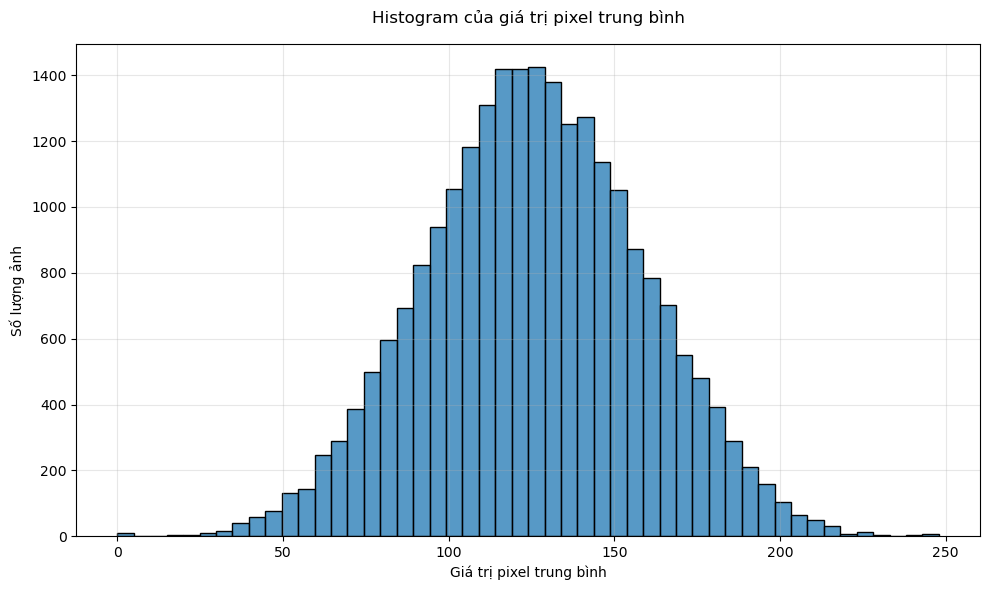

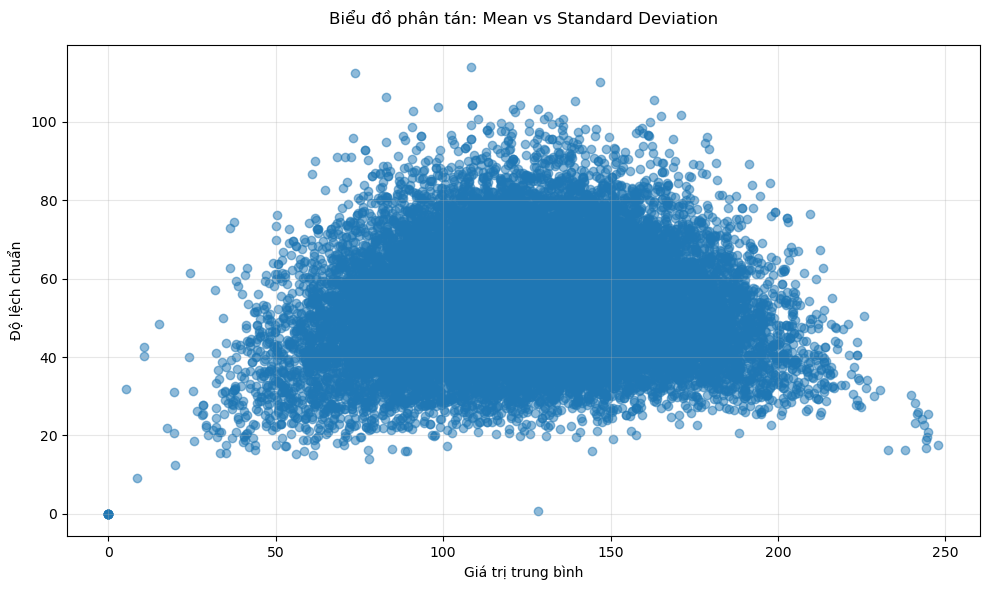


Thống kê giá trị pixel:
--------------------------------------------------
               mean           std           min           max        median
count  23595.000000  23595.000000  23595.000000  23595.000000  23595.000000
mean     125.756545     53.831740      7.715491    235.265310    129.674380
std       32.992104     13.763451     13.003718     25.391635     40.993802
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%      103.539497     44.201140      0.000000    224.000000    102.000000
50%      125.524306     53.331665      1.000000    245.000000    131.000000
75%      148.196832     62.975688     11.000000    255.000000    159.000000
max      247.953993    113.933127    205.000000    255.000000    255.000000


In [31]:
# Chuyển chuỗi pixel thành mảng numpy
def pixels_to_array(pixel_string):
    return np.array(pixel_string.split(' ')).astype(float).reshape(48, 48)

# Tính toán thống kê về pixel values
def analyze_pixel_statistics(df):
    # Tính toán thống kê pixel
    pixel_stats = df['pixels'].apply(lambda x: pd.Series({
        'mean': np.mean(pixels_to_array(x)),
        'std': np.std(pixels_to_array(x)),
        'min': np.min(pixels_to_array(x)),
        'max': np.max(pixels_to_array(x)),
        'median': np.median(pixels_to_array(x)),
    }))


    #  Histogram của giá trị trung bình
    plt.figure(figsize=(10, 6))
    sns.histplot(data=pixel_stats['mean'], bins=50)
    plt.title('Histogram của giá trị pixel trung bình', fontsize=12, pad=15)
    plt.xlabel('Giá trị pixel trung bình')
    plt.ylabel('Số lượng ảnh')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Scatter plot: Mean vs Std
    plt.figure(figsize=(10, 6))
    plt.scatter(pixel_stats['mean'], pixel_stats['std'], alpha=0.5)
    plt.title('Biểu đồ phân tán: Mean vs Standard Deviation', fontsize=12, pad=15)
    plt.xlabel('Giá trị trung bình')
    plt.ylabel('Độ lệch chuẩn')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # In thống kê
    print("\nThống kê giá trị pixel:")
    print("-" * 50)
    print(pixel_stats.describe())

    return pixel_stats

# Chạy phân tích
pixel_stats = analyze_pixel_statistics(df)

# Phân tích trung bình ảnh theo từng cảm xúc

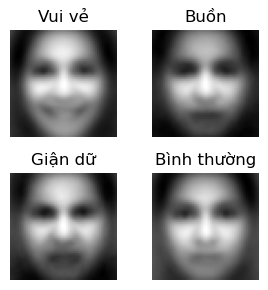

In [32]:
def plot_average_faces(df):
    fig, axes = plt.subplots(2, 2, figsize=(3, 3))
    emotions = ['Vui vẻ', 'Buồn', 'Giận dữ', 'Bình thường']
    
    for idx, emotion in enumerate(emotions):
        emotion_df = df[df['emotion'] == emotion]
        avg_face = np.mean([pixels_to_array(x) for x in emotion_df['pixels']], axis=0)
        
        ax = axes[idx//2, idx%2]
        ax.imshow(avg_face, cmap='gray')
        ax.set_title(f'{emotion}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

plot_average_faces(df)

# Phân tích độ tương phản và độ sáng

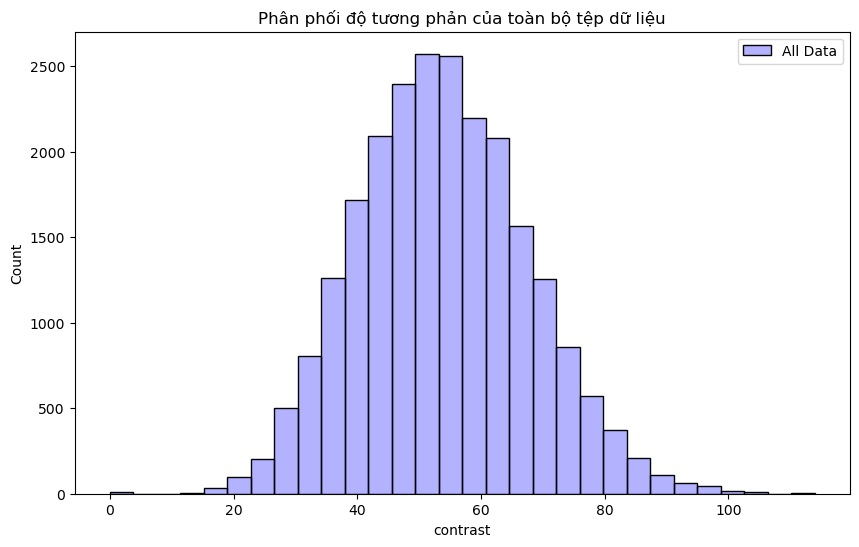

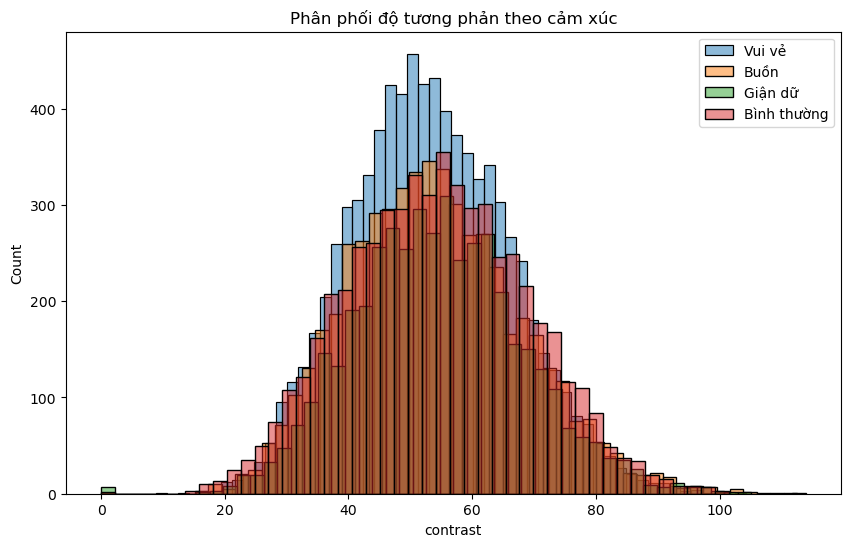

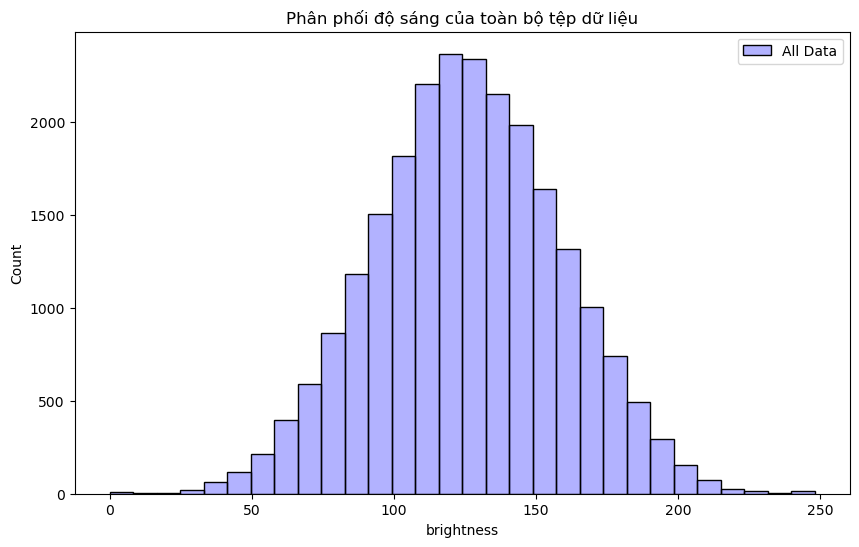

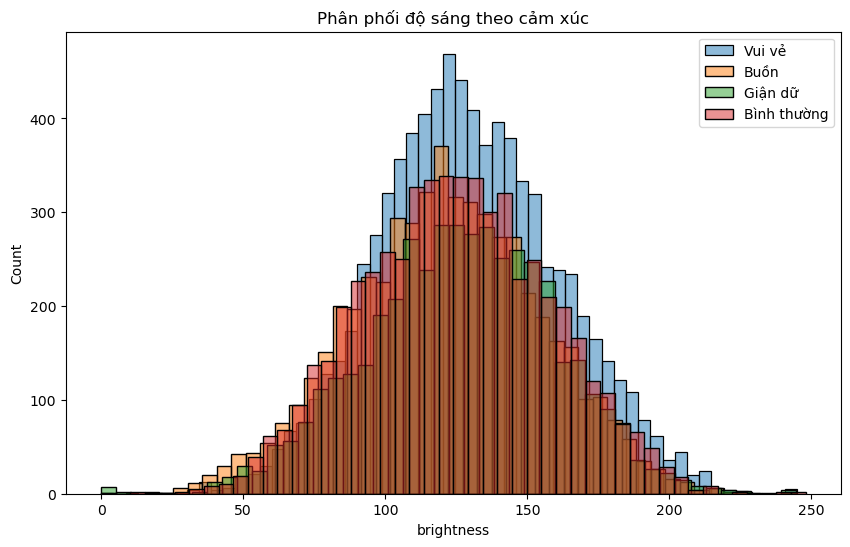

In [33]:
def analyze_image_properties(df):
    # Tạo list để lưu properties
    contrasts = []
    brightnesses = []
    
    for pixels in df['pixels']:
        img_array = pixels_to_array(pixels)
        contrasts.append(img_array.std())
        brightnesses.append(img_array.mean())
    
    # Thêm các cột mới trực tiếp vào DataFrame gốc
    df['contrast'] = contrasts
    df['brightness'] = brightnesses
    
    # Plot distributions by emotion using histograms
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='contrast', color='blue', label='All Data', alpha=0.3, bins=30)
    plt.title('Phân phối độ tương phản của toàn bộ tệp dữ liệu')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    for emotion in df['emotion'].unique():
        sns.histplot(data=df[df['emotion'] == emotion], x='contrast', 
                    label=emotion, alpha=0.5)
    plt.title('Phân phối độ tương phản theo cảm xúc')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='brightness', color='blue', label='All Data', alpha=0.3, bins=30)
    plt.title('Phân phối độ sáng của toàn bộ tệp dữ liệu')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    for emotion in df['emotion'].unique():
        sns.histplot(data=df[df['emotion'] == emotion], x='brightness', 
                    label=emotion, alpha=0.5)
    plt.title('Phân phối độ sáng theo cảm xúc')
    plt.legend()
    plt.show()
    
    return df

df = analyze_image_properties(df)

# Tổng hợp khai phá dữ liệu

In [34]:
def generate_summary_report(df):
    print("BÁO CÁO PHÂN TÍCH DỮ LIỆU:")
    print("-" * 50)
    
    # Class distribution
    print("\n1. Phân phối các lớp:")
    class_dist = df['emotion'].value_counts()
    for emotion, count in class_dist.items():
        print(f"{emotion}: {count} ảnh ({count/len(df)*100:.2f}%)")
    
    # Image statistics
    print("\n2. Thống kê giá trị pixel:")
    pixel_stats = df['pixels'].apply(lambda x: pd.Series({
        'mean': np.mean(pixels_to_array(x)),
        'std': np.std(pixels_to_array(x))
    }))
    print(pixel_stats.describe())
    
    # Brightness and contrast by emotion
    print("\n3. Độ sáng và độ tương phản trung bình theo cảm xúc:")
    print(df.groupby('emotion')[['brightness', 'contrast']].mean())

generate_summary_report(df)

BÁO CÁO PHÂN TÍCH DỮ LIỆU:
--------------------------------------------------

1. Phân phối các lớp:
Vui vẻ: 8094 ảnh (34.30%)
Bình thường: 5591 ảnh (23.70%)
Buồn: 5424 ảnh (22.99%)
Giận dữ: 4486 ảnh (19.01%)

2. Thống kê giá trị pixel:
               mean           std
count  23595.000000  23595.000000
mean     125.756545     53.831740
std       32.992104     13.763451
min        0.000000      0.000000
25%      103.539497     44.201140
50%      125.524306     53.331665
75%      148.196832     62.975688
max      247.953993    113.933127

3. Độ sáng và độ tương phản trung bình theo cảm xúc:
             brightness   contrast
emotion                           
Buồn         121.141306  53.779229
Bình thường  124.605816  54.341127
Giận dữ      126.480419  54.521218
Vui vẻ       129.243015  53.132932
